In [1]:
# Warmup 1: Worksheet 22 problem #1

# Pre-installed means we did not have to a special installation using pip
#   for recordclass, we had to do an installation (see installation video, Sept 8th)

# built-in means that we do NOT need to import it
#   we need to import namedtuple and recordclass before using them

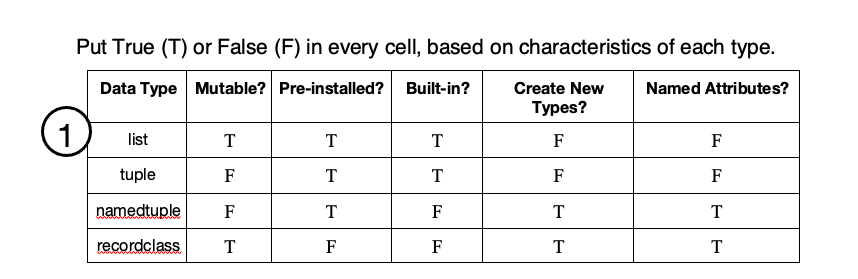

In [2]:
# For all the other problems on the Worksheet 22, we want you to copy-paste them
# into Python Tutor, predict what it will show, and then run it.

In [4]:
# Warmup 2a:  Use 'in' to determine if the given thing is in my_list
my_list = ["meet", "me",  "after", 84]
print("me" in my_list)
# you try one that is not in
print("you" not in my_list)

True
False


In [5]:
# Warmup 2b: what about this list? 
my_list = [11, "meet", ["me", "them", "us"],  [84,19, 22], "school", 2.54]

# try a couple of options here...
print("me" in my_list)
print(11 in my_list)
# when does 'in' work?  when the thing we're searching for is at the top level
# When does 'in' not work?  when thing is inside a 2nd group of brackets

False
True


In [12]:
# Warmup 3a: Write a function to find a thing in a nested list

def search_list_depth2(target, some_list):
    ''' returns True if target in some_list, False otherwise'''
    for thing in some_list:
        #print(thing, type(thing))
        if type(thing) != list:
            if target == thing:
                return True
        else: # is a list
            if target in thing: # thing is a list
                return True
    return False

print(search_list_depth2("school", my_list))  # in list
print(search_list_depth2(22, my_list))        # in nested list
print(search_list_depth2("house", my_list))   # not anywhere


True
True
False


In [7]:
# Warmup 3b: How would we change this code if we wanted to handle 3-deep lists? 
list_3_deep = [22, [33, 44, [55, 66], 77 ], 88]

In [8]:
def search_list_depth_any(target, some_list):
    ''' returns True if target in some_list, False otherwise'''

    
    return False

search_list_depth_any(55, list_3_deep)

False

In [ ]:
# what about ANY depth list? 
# that is the goal of today's lecture

### Lecture 22: Recursion

After today's Lecture you will be able to: 

22.1 Define recursion and be able to identify
- the base case
- the recursive case
- infinite recursion

22.2 Explain why the following can be recursively defined
- lists
- dictionaries
- JSON objects

22.3 Trace a recursive function
- involving numeric computation
- involving nested data structures


In [2]:
# Recursion is defined as the process of defining something in terms of itself 
# https://www.amazon.com/Programmer-Recursion-Definition-Coding-T-Shirt/dp/B07X4PNVCJ/ref=sr_1_7?dchild=1&keywords=recursion+t-shirt&qid=1615923295&sr=8-7

# also look at the Droste box I have

### 22.1 Define recursion and be able to identify 
- the base case
- the recursive case
- infinite recursion

In [4]:
# Mathematical sequences can be defined recursively:
# Write a definition for this sequence: 20, 60, 180, 540, ...
# A sub 1 = 20
# A sub n = A sub (n-1) * 3



In [5]:
# Define the term "positive even integer" without using multiplication or division
# A 'positive even integer' is an integer that is  ....... 

# any number that is two more than a positive even integer
# 2 is a positive even integer


In [6]:
# Another famous mathematical formula is factorial.
# Q:  What is the exact value of 37! = 37 * 36! 
# A:  0! = 1 ,  N! = N * (N-1)!



## A recursive algorithm must have 2 parts:
### 1.) a base case....which stops the recursion
### 2.) a recursive case...which defines the same process in a smaller way

## If there is no base case what happens in the above example? 
### recursion never ends......infinite recursion

## Infinite recursion can also happen if the recursive case does not move towards the base

In [13]:
# you can have two functions that are mutually recursive:
# run this in Python Tutor and watch the stack frames
# notice that 'word' and 'thing' are distinct in each frame
def f(word):
    print(word)
    if len(word) < 10: 
        g(word + "f")
    # if its 10 or more, recursion stops
    
def g(thing):
    print(thing)
    # make a recursive call to f that adds a different letter onto thing
    f(thing + "g")

f("hi ")

hi 
hi f
hi fg
hi fgf
hi fgfg
hi fgfgf
hi fgfgfg
hi fgfgfgf
hi fgfgfgfg


In [ ]:
# Q: In the example above, what happens if we remove the if statement? 
# A: infinite recursion....the Notebook will probably time out

### 22.3 Trace a recursive function involving numeric computation

In [10]:
# Tracing a recursive function in the Python Tutor
# example 1

def foo(n):
    # I always start recursive functions by printing the parameters
    print("Starting foo with n= " , n)
    if n < 0:
        print("base case, returning 100")
        return 100
    else:
        temp = foo(n-2)
        print("Ending foo returning " ,  (n + temp))
        return n + temp

foo(13)

# What happens if we replace < with == ? 

Starting foo with n=  13
Starting foo with n=  11
Starting foo with n=  9
Starting foo with n=  7
Starting foo with n=  5
Starting foo with n=  3
Starting foo with n=  1
Starting foo with n=  -1
base case, returning 100
Ending foo returning  101
Ending foo returning  104
Ending foo returning  109
Ending foo returning  116
Ending foo returning  125
Ending foo returning  136
Ending foo returning  149


149

In [11]:
# example 2...the Collatz Conjecture problem 
# https://en.wikipedia.org/wiki/Collatz_conjecture
# run this in Python Tutor on your ownn

def collatz(n):
    # I always start recursive functions by printing the parameters
    print("in collatz with n = " ,  n)
    if n == 1:
        return 1 # base case
    elif n % 2 == 0:
        return collatz(n//2)
    else:
        return collatz (3*n+1)

collatz(13)   # try other numbers


in collatz with n =  13
in collatz with n =  40
in collatz with n =  20
in collatz with n =  10
in collatz with n =  5
in collatz with n =  16
in collatz with n =  8
in collatz with n =  4
in collatz with n =  2
in collatz with n =  1


1

In [ ]:
# Show lecture slides.....

16807

### 22.3 Trace a recursive function involving nested data structures

In [16]:
# example 4

fav_stuff = [  "road bike",
    ["PB&J", "brownies", "spaghetti", "apples"] , 
             ("Brooks Ghost 13", "hoodie", "gloves"), 
             "macbook air", 
             [ "Johndee.com", "https://www.weather.gov/mkx/"],
             ["A", "K", ("S", "D", "K")]
            ]
        
print ("road bike" in fav_stuff)
print ( "brownies" in fav_stuff)  # Why is this happening? 

True
False


In [20]:
# Write a recursive function to search *ANY* list of lists/tuples for a given word
## we did this already get the code and paste it here
def search_list_depth(target, some_list):
    ''' returns True if target in some_list, False otherwise'''
    for thing in some_list:
        #print(thing, type(thing))
        if type(thing) != list and type(thing) != tuple:
            if target == thing:
                return True
        else: # is a list or a tuple
            if search_list_depth(target, thing):
                return True
    return False

print(search_list_depth("apples", fav_stuff))  # in list
print(search_list_depth("D", fav_stuff))        # in nested list
print(search_list_depth("road bike", fav_stuff))   # not anywhere

True
True
True


In [23]:
# write a function that prints nested lists with indenting
# 
def print_with_indenting(directory, indent):
    #print("starting print_with_indenting", directory, indent)
    for thing in directory:
        if type(thing) == list or type(thing) == tuple:
            print("   " * indent + str(type(thing)))
            print_with_indenting(thing, indent + 1)
        else:
            print("   " * indent + str(thing))
        
print_with_indenting(fav_stuff, 0)

road bike
<class 'list'>
   PB&J
   brownies
   spaghetti
   apples
<class 'tuple'>
   Brooks Ghost 13
   hoodie
   gloves
macbook air
<class 'list'>
   Johndee.com
   https://www.weather.gov/mkx/
<class 'list'>
   A
   K
   <class 'tuple'>
      S
      D
      K


In [ ]:
# call the above function on a directory type lists of lists

### 22.2 Explain why the following can be recursively defined

- lists
- dictionaries
- JSON objects

In [14]:
# A list contains objects, including lists

In [15]:
# A dictionary contains key/value pairs. 
# The keys must be immutable, but the values may be mutable.
# So, the values in a dictionary can be dictionaries.

*JSON files are defined recursively*

*A JSON file is a dictionary is a set of JSON mappings*
*A JSON mapping is a key/value pair where the key is a string*
*and the value is a string, number, or a JSON Mapping*

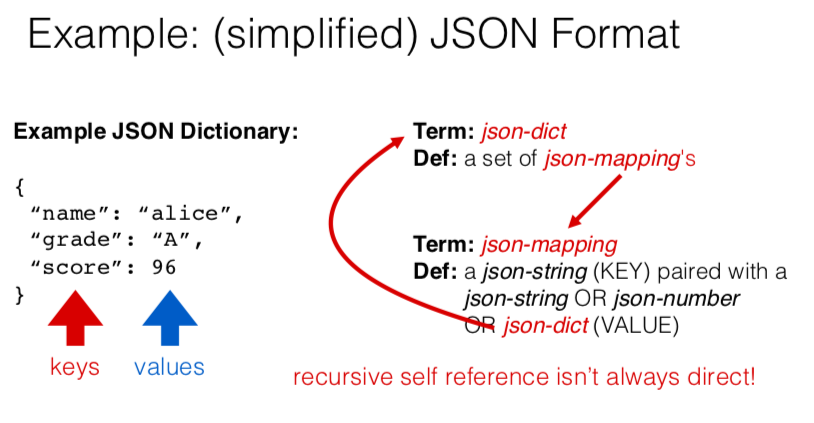


## Interactive Exercises
http://pytutor.ddns.net/cs220-fall20/worksheets/html/Lec22-InteractiveExercises.html

In [60]:
# Extra practice...can you predict the outcome?
# run this on your own in Python Tutor

def mystery(a, b): 
# precondition: a > 0 and b > 0
    if b == 1: 
        return a;
    return a * mystery( a, b - 1 )

# make a function call here
mystery(7, 5)

16807

### These two things are only for fun ...not part of CS 220

Fractal Snowflake....can you find the base case? 

https://repl.it/@kuemmela/csp12-03-snowflake#main.py


Recursive Flood Fill

https://repl.it/@kuemmela/csp12-floodfill#main.py
